# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sfpuf2022_1_fall.csv to sfpuf2022_1_fall (1).csv


In [2]:
#2.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("sfpuf2022_1_fall.csv")
print(df.shape)

<ipython-input-2-67a51ef16e5a>:6: DtypeWarning: Columns (43,46,49,50,51,52,53,64,68,70,73,74,76,77,81,83,84,85,86,87,88,89,90,92,96,99,100,101,105,106,107,110,112,113,116,118,119,120,123,124,125,126,127,129,136,137,138,139,140,141,143,144,149,150,151,157,158,162,166,170,171,175,186,187,188,189,190,193,195,196,198,199,200,201,202,204,205,206,212,214,215,216,217,218,219,220,222,223,224,225,226,227,228,229,231,232,233,234) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sfpuf2022_1_fall.csv")


(12477, 342)


2.2:

The MCBS data dictionary shows how missing values are handled, but it uses special numbers instead of NaN. For numeric variables, missing values are often coded as 999999, 999999.99, or -1. For categorical variables, missing or unclear responses are coded as 7 for “Refused,” 8 for “Don’t Know,” and 9 for “Missing.” These need to be changed to NaN when cleaning the data. The dictionary explains most codes but isn’t always clear, so you have to read each variable carefully. It works fine, but it's a bit tricky if you're new to survey data.



2.3:
I will pick:

AGEGRP2 : Age category (Categorical)

RACEETHN : Race/Ethnicity (Categorical)

SELFHEALTH : Self-reported health status (Categorical)

TOTCSTYR : Total medical costs for the year (Numeric)

INCOMEQ : Income quartile (Categorical)

The reason I chose these variables because this is very interesting for understanding healthcare usage across demographics.

In [3]:
#2.3

# we will keep all the variables we chose
vars_to_keep = ['DEM_AGE', 'DEM_RACE', 'HLT_GENHELTH', 'PUFF091', 'DEM_INCOME']
df_subset = df[vars_to_keep].copy()

#  renamed
df_subset.rename(columns={
    'DEM_AGE': 'AGE',
    'DEM_RACE': 'RACE',
    'HLT_GENHELTH': 'SELFHEALTH',
    'PUFF091': 'TOTCSTYR', # total medical cost
    'DEM_INCOME': 'INCOME'
}, inplace=True)

# handles missing/invalid cost data
df_subset = df_subset[df_subset['TOTCSTYR'] < 999999]

# this checks if the values are in selfhealth before replacing
print("Original SELFHEALTH values:\n", df_subset['SELFHEALTH'].value_counts(dropna=False))


# we will recode self health beased on mcbs codebook:
df_subset['SELFHEALTH'] = df_subset['SELFHEALTH'].replace({
    '1': 'Excellent',
    '2': 'Very Good',
    '3': 'Good',
    '4': 'Fair',
    '5': 'Poor',
    'D': None,
    'R': None
})
print("After replacement:\n", df_subset['SELFHEALTH'].value_counts(dropna=False))

# we can view the cleaned data:
df_subset.head()

Original SELFHEALTH values:
 SELFHEALTH
2      3962
3      3706
1      2091
4      2010
5       663
D        36
NaN       6
R         3
Name: count, dtype: int64
After replacement:
 SELFHEALTH
Very Good    3962
Good         3706
Excellent    2091
Fair         2010
Poor          663
None           39
NaN             6
Name: count, dtype: int64


,AGE,RACE,SELFHEALTH,TOTCSTYR,INCOME
0,1,2,Excellent,1596.191490,1
1,2,1,Very Good,1591.480139,2
2,3,1,Very Good,601.879050,1
3,3,2,Good,632.511188,1
4,2,3,Excellent,35540.271271,1


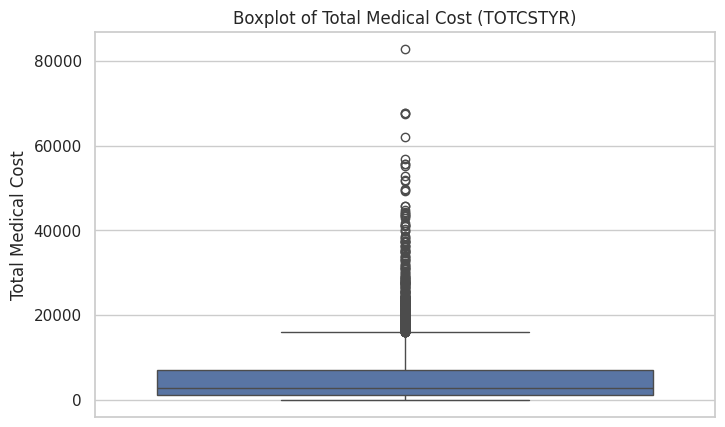

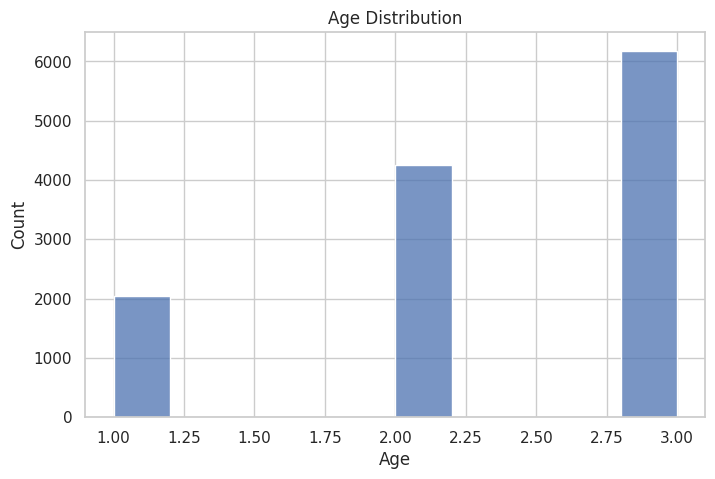

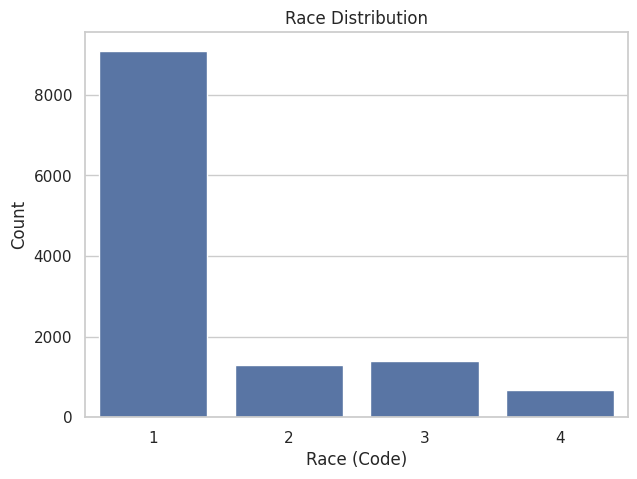

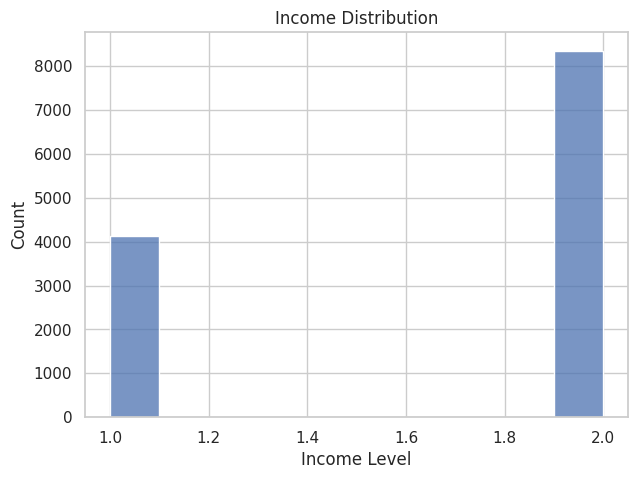

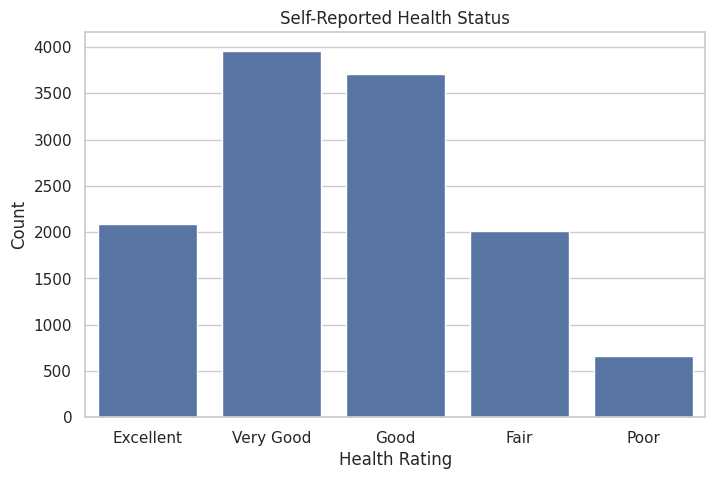

In [4]:
#2.4

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot, bar graphs, outlier check

sns.set(style="whitegrid")

#boxplot for numeric value: TOTCSTYR:
plt.figure(figsize=(8, 5))
sns.boxplot(y='TOTCSTYR', data=df_subset)
plt.title("Boxplot of Total Medical Cost (TOTCSTYR)")
plt.ylabel("Total Medical Cost")
plt.show()

#barplot for age
plt.figure(figsize=(8, 5))
sns.histplot(df_subset['AGE'], bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#bar plot for race
plt.figure(figsize=(7, 5))
sns.countplot(x='RACE', data=df_subset)
plt.title("Race Distribution")
plt.xlabel("Race (Code)")
plt.ylabel("Count")
plt.show()

# bar plot for incoem
plt.figure(figsize=(7, 5))
sns.histplot(df_subset['INCOME'], bins=10, kde=False)
plt.title("Income Distribution")
plt.xlabel("Income Level")
plt.ylabel("Count")
plt.show()

# bar plot for selfhealth
plt.figure(figsize=(8, 5))
sns.countplot(x='SELFHEALTH', data=df_subset, order=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
plt.title("Self-Reported Health Status")
plt.xlabel("Health Rating")
plt.ylabel("Count")
plt.show()


In [5]:
# Check unique values and value counts in SELFHEALTH
print("UNIQUE VALUES:", df_subset['SELFHEALTH'].unique())
print("\nVALUE COUNTS:\n", df_subset['SELFHEALTH'].value_counts(dropna=False))
print("\nNON-MISSING COUNT:", df_subset['SELFHEALTH'].notna().sum())


UNIQUE VALUES: ['Excellent' 'Very Good' 'Good' 'Poor' 'Fair' None nan]

VALUE COUNTS:
 SELFHEALTH
Very Good    3962
Good         3706
Excellent    2091
Fair         2010
Poor          663
None           39
NaN             6
Name: count, dtype: int64

NON-MISSING COUNT: 12432


2.4:

Yes, there are outliers in the **Total Medical Cost (TOTCSTYR)** boxplot. As seen above, some people spent over **$80,000**, which is much higher than the rest. This is common in healthcare data because a few people have very high medical expenses. The bar plots for **Age**, **Race**, **Income**, and **Self-Reported Health** don’t show much outliers since they are categorical, but they do show uneven distributions. For example: more people being in higher income and older age groups.

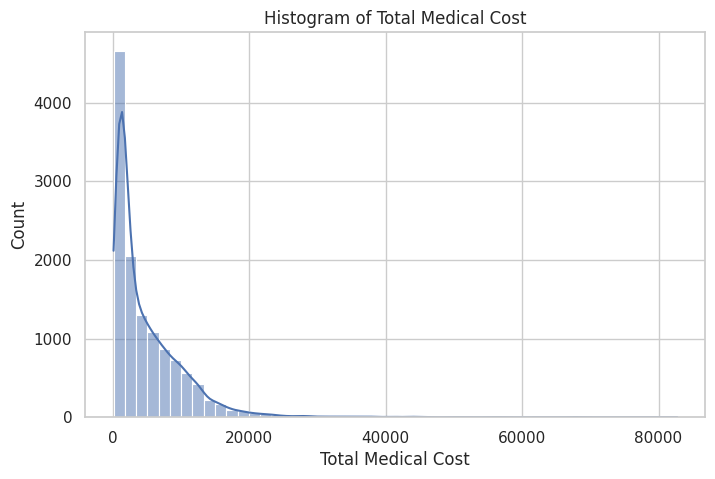

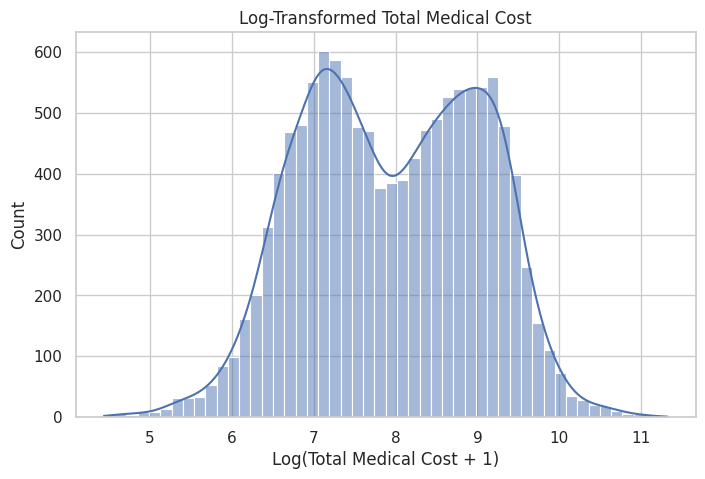

In [6]:
#2.5

# Histogram of total medical cost
import numpy as np
plt.figure(figsize=(8, 5))
sns.histplot(df_subset['TOTCSTYR'], bins=50, kde=True)
plt.title("Histogram of Total Medical Cost")
plt.xlabel("Total Medical Cost")
plt.ylabel("Count")
plt.show()

# Log-transformed version to handle skew
df_subset['LOG_COST'] = np.log1p(df_subset['TOTCSTYR'])

plt.figure(figsize=(8, 5))
sns.histplot(df_subset['LOG_COST'], bins=50, kde=True)
plt.title("Log-Transformed Total Medical Cost")
plt.xlabel("Log(Total Medical Cost + 1)")
plt.ylabel("Count")
plt.show()


The histogram of the total medical cost is highly right skewed with most of the values clustered on lower end and a long tail of high cost cases. A log transformation will help spread out data and make distribution look more normal.

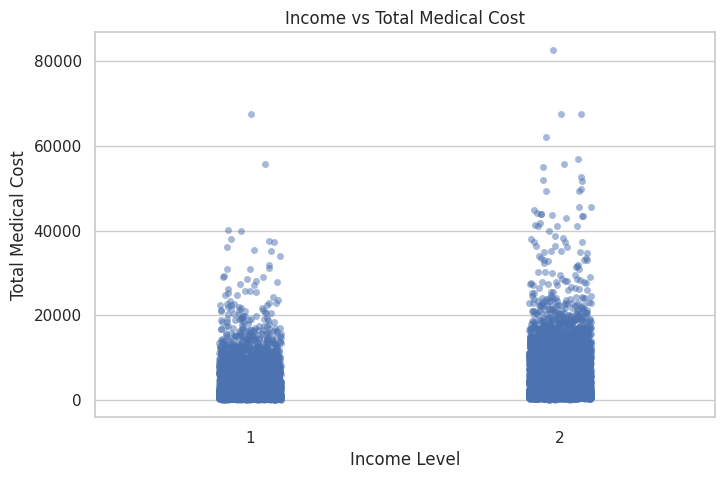

In [7]:
#2.6
plt.figure(figsize=(8, 5))
sns.stripplot(x='INCOME', y='TOTCSTYR', data=df_subset, jitter=True, alpha=0.5)
plt.title("Income vs Total Medical Cost")
plt.xlabel("Income Level")
plt.ylabel("Total Medical Cost")
plt.show()


The scatter plot shows that both income groups 1 and group 2 have a wide range of total medical costs. Many people in both groups have very high costs, and there is no clear pattern between income and medical spending. This suggests that total medical cost is not strongly related to income and is more likely influenced by personal health conditions or medical needs.

In [8]:
#2.7
# .describe() five-number summary for numeric vars
print(df_subset[['AGE', 'INCOME', 'TOTCSTYR']].describe())


                AGE        INCOME      TOTCSTYR
count  12477.000000  12477.000000  12477.000000
mean       2.332372      1.669472   4924.267455
std        0.740585      0.470422   5506.900993
min        1.000000      1.000000     83.418621
25%        2.000000      1.000000   1198.533540
50%        2.000000      2.000000   2865.847365
75%        3.000000      2.000000   7129.412956
max        3.000000      2.000000  82736.721076


The summary shows that most people are in age group 2 and income level 2. The average total medical cost is about 4900, but the max goes up to over 82000, showing high-cost outliers. The cost distribution is right-skewed with many spending under 3000.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.